<a href="https://colab.research.google.com/github/sarahmagdi/ml1_project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%%capture
!pip install mediapipe

In [4]:
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import mediapipe
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow

In [5]:
# Loading AFLW2000 Data
%%capture
if os.path.isfile('/content/AFLW2000-3D.zip') == False:
  !gdown --id  1fP3zvSCYjll_o_m7S12nvQLZ9MnsEoap
  !unzip /content/AFLW2000-3D.zip

In [6]:
#function to draw the lines on image
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

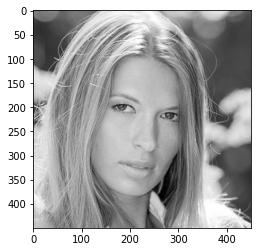

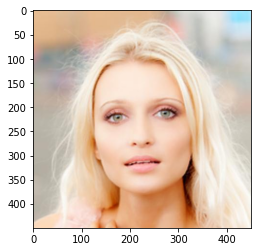

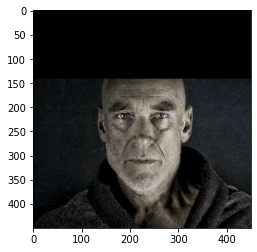

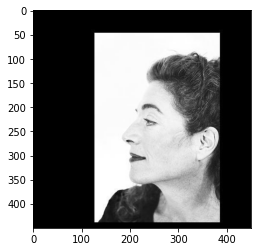

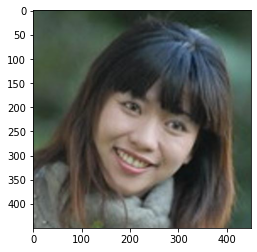

['/content/AFLW2000/image00595.jpg',
 '/content/AFLW2000/image00972.jpg',
 '/content/AFLW2000/image00093.jpg',
 '/content/AFLW2000/image00428.jpg',
 '/content/AFLW2000/image02076.jpg']

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# save all  names of images files  with 
#make sure the path (AFLW2000-3D)
imgs_pathes_list = glob.glob('/content/AFLW2000/*.jpg')

# loop through the list and show the image to certain image is red
for path in imgs_pathes_list[:5]:
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # to convert BGR image to RGB because cv2 read images as BGR formate
    plt.imshow(image)
    plt.show()
    #cv2_imshow(image)
    
    

imgs_pathes_list[0:5]   

In [8]:
img_name = path.split('.jpg')[0]
print(img_name)

/content/AFLW2000/image02076


In [358]:
#to get name without extension
#img_name = path.split('.jpg')[0]
# add the .mat extension
#path_mat = img_name + '.mat'
random_file = 'image00053'

faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
    # processing the face to extract the landmark points (468 point) for each x,y,z 
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks != None: 
      # looping over the faces in the image
      for face in results.multi_face_landmarks:
          face.landmark
          break
      

In [433]:
image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')


In [81]:
[11,13,16,17,19,31,32,33,34,35,36,37,42:56,60,63:72,79:88:94,96,97,99:110,112,114,116:125,127,129,130,131,132,134:138,140,143,144,148,152,157,165:168,180:195,179,199:215,217 :221,228 :235, 237:244,246,248,249 ,251,252 ,262,264:271,284:296,302,305:314,321:330,336,338,339,341:352                                            ]
199

[11, 13, 16, 17, 19]

In [ ]:
last seen 260
median243
110 minas 1
mise 88:94

In [431]:
ls=[11,13,16,17,19,31,32,33,34,35,36,37,60,94,96,112,114,127,129,130,131,132,140,143,144,148,152,157,179,217 ,218,219,220,221,246,248,249 ,251,252 ,262,302,336,338,339,354,356,369,371,372,373,374,382,385,386,376,377,378,379,400,382,385,386,390,394,399 ]


In [432]:
x=list(range(42, 57,1))
y=list(range(63,72,1))
z=list(range(79,88,1))
w=list(range(99,110,1))
w2=list(range(116,125,1))
w3=list(range(134,138,1))
w4=list(range(165,168,1))
w5=list(range(180,195,1))
w6=list(range(199,215,1))
w7=list(range(228 ,235,1))
w8=list(range(237,244,1))
w9=list(range(264,271,1))
w10=list(range(284,296,1))
w10=list(range(305,314,1))
w11=list(range(305,314,1))
w12=list(range(321,330,1))
w13=list(range(341,352,1))
w14=list(range(358,267,1))
w15=list(range(376,380,1))
w16=list(range(407,410,1))
w17=list(range(422,437,1))
w18=list(range(441,457,1))
w19=list(range(459,463,1))


In [ ]:
165:168,180:195,179,199:215,217 :221,228 :235, 237:244,246,248,249 ,251,252 ,262,264:271,284:296,302,305:314,321:330,336,338,339,341:352

228 :235 after that

In [434]:
ls.extend(x)
ls.extend(y)
ls.extend(z)
ls.extend(w)
ls.extend(w2)
ls.extend(w3)
ls.extend(w4)
ls.extend(w5)
ls.extend(w6)
ls.extend(w7)
ls.extend(w8)
ls.extend(w9)
ls.extend(w10)
ls.extend(w11)
ls.extend(w12)
ls.extend(w13)
ls.extend(w14)
ls.extend(w15)
ls.extend(w16)
ls.extend(w17)
ls.extend(w18)
ls.extend(w19)


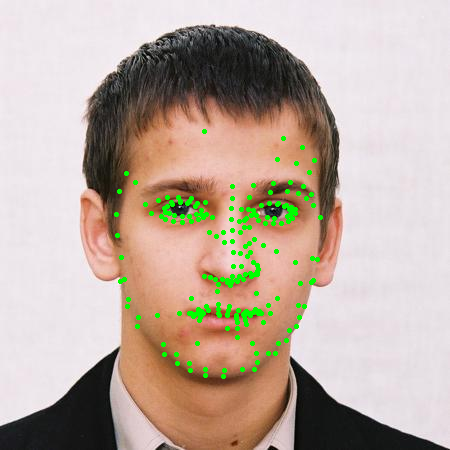

In [435]:
i=1
for landmark in face.landmark:
              if i in ls:
                i+=1
                continue  
              x = landmark.x
              y = landmark.y
              # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
              shape = image.shape 
              relative_x = int(x * shape[1])
              relative_y = int(y * shape[0])
              # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
              cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
              i+=1
cv2_imshow(image)

In [404]:
i

11

In [388]:
j=1
for i in  ls:
    
        print(i)   
ls  

[]

In [44]:
face.landmark

[x: 0.4562339186668396
y: 0.6167235970497131
z: -0.05200573429465294
, x: 0.45341911911964417
y: 0.5626360177993774
z: -0.07435543090105057
, x: 0.46379411220550537
y: 0.5842686891555786
z: -0.044213660061359406
, x: 0.4593377411365509
y: 0.522498369216919
z: -0.04199746996164322
, x: 0.4551483988761902
y: 0.5478881597518921
z: -0.07666029036045074
, x: 0.46236976981163025
y: 0.5327767729759216
z: -0.06794372200965881
, x: 0.4838218688964844
y: 0.49937641620635986
z: -0.023373162373900414
, x: 0.4135071337223053
y: 0.4988868832588196
z: 0.07642243802547455
, x: 0.4915987551212311
y: 0.4745268225669861
z: -0.008850175887346268
, x: 0.49331924319267273
y: 0.4570954442024231
z: -0.0072272284887731075
, x: 0.511279284954071
y: 0.3931637406349182
z: 0.023167842999100685
, x: 0.4555246829986572
y: 0.6243822574615479
z: -0.05153730884194374
, x: 0.4564995765686035
y: 0.6317811608314514
z: -0.047715991735458374
, x: 0.45873409509658813
y: 0.6365054249763489
z: -0.04209144413471222
, x: 0.45595

In [11]:
#to extract landmarks  (468 3D face landmarks)
faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
all_featuresANDlabels=[]
#img_landmarks=[]
with faceModule.FaceMesh(static_image_mode=True) as faces:
   
    for path in imgs_pathes_list:
        img_landmarks=[] 
          # to load and read image
        image = cv2.imread(path)
        # processing the face to extract the landmark points (468 point) for each x,y,z 
        results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if results.multi_face_landmarks != None: 
          # looping over the faces in the image
          for face in results.multi_face_landmarks:
              for landmark in face.landmark:
                img_landmarks.extend([landmark.x, landmark.y])
              break #to take first face only
        #to get name without extension
        img_name = path.split('.jpg')[0]
        # add the .mat extension
        path_mat = img_name + '.mat'
        data = sio.loadmat(path_mat)
        labels = data['Pose_Para'][0][:3]#pitch,yaw,roll
        #img_landmarks.extend(labels)
        pitch = labels[0]
        yaw = labels[1]
        roll = labels[2]
        img_landmarks.extend([pitch,yaw,roll])
        all_featuresANDlabels.append(img_landmarks)  

                  

In [447]:
columns_name = [['x' + str(i),'y' + str(i)] for i in range(len(face.landmark))]
columns_name=np.array(columns_name)
x=columns_name.reshape(1,-1)[0].tolist()
x.extend(['pitch','yaw','roll'])
print(x)


['x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12', 'y12', 'x13', 'y13', 'x14', 'y14', 'x15', 'y15', 'x16', 'y16', 'x17', 'y17', 'x18', 'y18', 'x19', 'y19', 'x20', 'y20', 'x21', 'y21', 'x22', 'y22', 'x23', 'y23', 'x24', 'y24', 'x25', 'y25', 'x26', 'y26', 'x27', 'y27', 'x28', 'y28', 'x29', 'y29', 'x30', 'y30', 'x31', 'y31', 'x32', 'y32', 'x33', 'y33', 'x34', 'y34', 'x35', 'y35', 'x36', 'y36', 'x37', 'y37', 'x38', 'y38', 'x39', 'y39', 'x40', 'y40', 'x41', 'y41', 'x42', 'y42', 'x43', 'y43', 'x44', 'y44', 'x45', 'y45', 'x46', 'y46', 'x47', 'y47', 'x48', 'y48', 'x49', 'y49', 'x50', 'y50', 'x51', 'y51', 'x52', 'y52', 'x53', 'y53', 'x54', 'y54', 'x55', 'y55', 'x56', 'y56', 'x57', 'y57', 'x58', 'y58', 'x59', 'y59', 'x60', 'y60', 'x61', 'y61', 'x62', 'y62', 'x63', 'y63', 'x64', 'y64', 'x65', 'y65', 'x66', 'y66', 'x67', 'y67', 'x68', 'y68', 'x69', 'y69', 'x70', 'y70', 'x71', 'y71', 'x72', 'y72

In [13]:
df =pd.DataFrame(all_featuresANDlabels,columns = x)

df.head(5)

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y464,x465,y465,x466,y466,x467,y467,pitch,yaw,roll
0,0.510301,0.705174,0.539955,0.637258,0.521339,0.651402,0.526380,0.556619,0.545696,0.616022,...,0.496514,0.565178,0.502666,0.665532,0.484771,0.673633,0.481386,-0.297849,-0.202252,0.193086
1,0.496543,0.676518,0.490750,0.606071,0.494637,0.629771,0.473451,0.539933,0.489455,0.584179,...,0.494036,0.528563,0.496846,0.647391,0.470059,0.657674,0.463056,0.075391,0.066288,-0.076080
2,0.508726,0.672566,0.506480,0.612537,0.506519,0.626895,0.489819,0.552107,0.505869,0.595384,...,0.502198,0.528996,0.506480,0.618540,0.486023,0.626760,0.478864,-0.131794,0.011347,-0.020842
3,0.430302,0.627628,0.404915,0.573253,0.437721,0.597468,0.429249,0.532822,0.404812,0.558316,...,0.511522,0.493457,0.512846,0.569068,0.510750,0.580133,0.505476,0.688345,1.207175,0.414514
4,0.476873,0.671305,0.500210,0.627153,0.492089,0.639333,0.512359,0.552763,0.508868,0.607941,...,0.522037,0.577065,0.524026,0.688936,0.546657,0.701277,0.543878,-0.138380,0.087130,0.405625


In [14]:
len(df)

2000

In [15]:
len(imgs_pathes_list)

2000

In [26]:
df2=df.dropna()

In [27]:
df2.head(5)

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y464,x465,y465,x466,y466,x467,y467,pitch,yaw,roll
0,0.510301,0.705174,0.539955,0.637258,0.521339,0.651402,0.526380,0.556619,0.545696,0.616022,...,0.496514,0.565178,0.502666,0.665532,0.484771,0.673633,0.481386,-0.297849,-0.202252,0.193086
1,0.496543,0.676518,0.490750,0.606071,0.494637,0.629771,0.473451,0.539933,0.489455,0.584179,...,0.494036,0.528563,0.496846,0.647391,0.470059,0.657674,0.463056,0.075391,0.066288,-0.076080
2,0.508726,0.672566,0.506480,0.612537,0.506519,0.626895,0.489819,0.552107,0.505869,0.595384,...,0.502198,0.528996,0.506480,0.618540,0.486023,0.626760,0.478864,-0.131794,0.011347,-0.020842
3,0.430302,0.627628,0.404915,0.573253,0.437721,0.597468,0.429249,0.532822,0.404812,0.558316,...,0.511522,0.493457,0.512846,0.569068,0.510750,0.580133,0.505476,0.688345,1.207175,0.414514
4,0.476873,0.671305,0.500210,0.627153,0.492089,0.639333,0.512359,0.552763,0.508868,0.607941,...,0.522037,0.577065,0.524026,0.688936,0.546657,0.701277,0.543878,-0.138380,0.087130,0.405625


In [436]:
drop_columns_name = [['x' + str(i),'y' + str(i)] for i in ls]
drop_columns_name
drop_columns_name=np.array(drop_columns_name)
drop_columns_name=drop_columns_name.reshape(1,-1)[0].tolist()

In [452]:
for j in drop_columns_name[:]:
        if j in x:
            x.remove(j)
            
  

In [437]:
drop_columns_name

['x11',
 'y11',
 'x13',
 'y13',
 'x16',
 'y16',
 'x17',
 'y17',
 'x19',
 'y19',
 'x31',
 'y31',
 'x32',
 'y32',
 'x33',
 'y33',
 'x34',
 'y34',
 'x35',
 'y35',
 'x36',
 'y36',
 'x37',
 'y37',
 'x60',
 'y60',
 'x94',
 'y94',
 'x96',
 'y96',
 'x112',
 'y112',
 'x114',
 'y114',
 'x127',
 'y127',
 'x129',
 'y129',
 'x130',
 'y130',
 'x131',
 'y131',
 'x132',
 'y132',
 'x140',
 'y140',
 'x143',
 'y143',
 'x144',
 'y144',
 'x148',
 'y148',
 'x152',
 'y152',
 'x157',
 'y157',
 'x179',
 'y179',
 'x217',
 'y217',
 'x218',
 'y218',
 'x219',
 'y219',
 'x220',
 'y220',
 'x221',
 'y221',
 'x246',
 'y246',
 'x248',
 'y248',
 'x249',
 'y249',
 'x251',
 'y251',
 'x252',
 'y252',
 'x262',
 'y262',
 'x302',
 'y302',
 'x336',
 'y336',
 'x338',
 'y338',
 'x339',
 'y339',
 'x354',
 'y354',
 'x356',
 'y356',
 'x369',
 'y369',
 'x371',
 'y371',
 'x372',
 'y372',
 'x373',
 'y373',
 'x374',
 'y374',
 'x382',
 'y382',
 'x385',
 'y385',
 'x386',
 'y386',
 'x376',
 'y376',
 'x377',
 'y377',
 'x378',
 'y378',
 'x3

In [438]:
print(len(ls)*2)
len(drop_columns_name)

514


514

In [439]:
df2.drop(drop_columns_name, axis=1, inplace=True)

In [454]:
len(df2.columns)

457

In [ ]:
drop_columns_name

In [455]:
len(x)

457

In [459]:
x[0:454]

['x0',
 'y0',
 'x1',
 'y1',
 'x2',
 'y2',
 'x3',
 'y3',
 'x4',
 'y4',
 'x5',
 'y5',
 'x6',
 'y6',
 'x7',
 'y7',
 'x8',
 'y8',
 'x9',
 'y9',
 'x10',
 'y10',
 'x12',
 'y12',
 'x14',
 'y14',
 'x15',
 'y15',
 'x18',
 'y18',
 'x20',
 'y20',
 'x21',
 'y21',
 'x22',
 'y22',
 'x23',
 'y23',
 'x24',
 'y24',
 'x25',
 'y25',
 'x26',
 'y26',
 'x27',
 'y27',
 'x28',
 'y28',
 'x29',
 'y29',
 'x30',
 'y30',
 'x38',
 'y38',
 'x39',
 'y39',
 'x40',
 'y40',
 'x41',
 'y41',
 'x57',
 'y57',
 'x58',
 'y58',
 'x59',
 'y59',
 'x61',
 'y61',
 'x62',
 'y62',
 'x72',
 'y72',
 'x73',
 'y73',
 'x74',
 'y74',
 'x75',
 'y75',
 'x76',
 'y76',
 'x77',
 'y77',
 'x78',
 'y78',
 'x88',
 'y88',
 'x89',
 'y89',
 'x90',
 'y90',
 'x91',
 'y91',
 'x92',
 'y92',
 'x93',
 'y93',
 'x95',
 'y95',
 'x97',
 'y97',
 'x98',
 'y98',
 'x110',
 'y110',
 'x111',
 'y111',
 'x113',
 'y113',
 'x115',
 'y115',
 'x125',
 'y125',
 'x126',
 'y126',
 'x128',
 'y128',
 'x133',
 'y133',
 'x138',
 'y138',
 'x139',
 'y139',
 'x141',
 'y141',
 'x142

In [460]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(df2[x[0:454]], df2[['pitch','yaw','roll']], test_size=0.2, random_state=42)
labels_train.head(5)

,pitch,yaw,roll
884,-0.085738,-0.404924,0.278171
263,0.036318,-0.447323,-0.115917
1325,-0.317595,-1.168614,0.382536
1767,-0.207506,-0.817491,0.363930
1167,-0.086928,-0.954173,0.240022


In [461]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482 entries, 884 to 1216
Columns: 454 entries, x0 to y467
dtypes: float64(454)
memory usage: 5.1 MB


In [468]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(features_train, labels_train['pitch'])
print(reg.score( features_train, labels_train['pitch']))
print('R2 Score:', r2_score(labels_test['pitch'] , y_predict))

0.8703679878729367
R2 Score: -3.201366632006472


In [463]:
y_predict=reg.predict(features_test)

In [465]:
# Import xgboost regression model
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

model1 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=4, seed=42).fit(features_train, labels_train['pitch'])


[23:20:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [466]:
y_pred_pitch = model1.predict(features_test)

In [ ]:
labels_test

In [467]:
print('Pitch:')
print('Mean Squared Error:', mean_squared_error(labels_test['pitch'] , y_pred_pitch))
print('R2 Score:', r2_score(labels_test['pitch'] , y_pred_pitch))
print('Mean Absolute Error:', mean_absolute_error(labels_test['pitch'] , y_pred_pitch))
print('Explained Variance Score:', explained_variance_score(labels_test['pitch'] , y_pred_pitch))

Pitch:
Mean Squared Error: 0.030839436890776496
R2 Score: 0.650440087565436
Mean Absolute Error: 0.10595062026587591
Explained Variance Score: 0.6521723561825987


In [22]:
labels_test[0:100]

,pitch,yaw,roll
1860,0.085060,1.275130,-0.166512
353,0.316947,1.075203,0.492687
1333,NaN,NaN,NaN
905,NaN,NaN,NaN
1289,0.106051,0.206996,-0.286197
...,...,...,...
1833,-0.526114,-0.936169,0.436408
651,-0.059923,-1.272292,-0.473971
1233,-0.304199,-1.065023,-0.028131
1502,0.109891,0.266022,-0.078270
